In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import QUANTAXIS as QA

#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,8]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

import os

#数据所在目录
p=os.path.join(os.path.abspath(os.curdir),'data')

#日线数据所在目录
daily_path=os.path.join(p,'daily')

import datetime
#日线数据开始日期
s='1990-01-01'
#日线数据结束日期
e='2018-12-31'
#IPO截止日期,000300的数据从这天以后才有，所以从这天开始开始，后面上市的暂不统计
ipo=datetime.datetime(2005,1,1)

In [78]:
#读取信息数据
info_path=os.path.join(p,'info.bz2')
if not os.path.exists(info_path):
    info=pd.DataFrame()
    for index in stock_list.index:
        symbol=stock_list.loc[index]
    #     print('{0} {1}({2}) Start'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),symbol['name'],symbol['code']))
        try:
            i=QA.QAFetch.QATdx.QA_fetch_get_stock_info(symbol['code'])
            if info.empty:
                info=i
            else:
                info=info.append(i)
        except:
            print('{0} Error.'.format(symbol['code']))
            continue
        #     print('{0} {1}({2}) Done'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),symbol['name'],symbol['code']))
    info.head()
    #ipo日期可能有为0的
    info=info[info['ipo_date']!=0]
    info.to_csv(info_path,compression='bz2')
#读取本地info数据
info=pd.read_csv(info_path,compression='bz2',dtype={'code':str})
#只留ipo日期小于ipo设定的数据
info=info[pd.to_datetime(info['ipo_date'],format='%Y%m%d')<=ipo]
info

,Unnamed: 0,market,code,liutongguben,province,industry,updated_date,ipo_date,zongguben,guojiagu,...,touzishouyu,jingyingxianjinliu,zongxianjinliu,cunhuo,lirunzonghe,shuihoulirun,jinglirun,weifenpeilirun,meigujingzichan,baoliu2
0,0,0,000001,1.717025e+10,18,1,20181024,19910403,1.717041e+10,1.801990e+09,...,7.099000e+10,-1.131000e+11,2.556800e+11,0.000000e+00,2.656600e+11,2.045600e+11,2.045600e+11,9.197300e+11,12.540,9.0
1,0,0,000002,9.715170e+09,18,11,20181026,19910129,1.103915e+10,1.901010e+09,...,2.650013e+10,-2.573118e+11,-4.167099e+11,7.078930e+12,3.166211e+11,2.179780e+11,1.398456e+11,8.381792e+11,0.000,9.0
2,0,0,000004,8.301320e+07,18,34,20181031,19910114,8.397670e+07,1.285010e+09,...,3.934700e+07,-2.431500e+07,1.707170e+08,2.102460e+08,-6.873600e+07,-7.308600e+07,-2.591700e+07,3.108930e+08,0.000,9.0
3,0,0,000005,1.057946e+09,18,11,20181228,19901210,1.058537e+09,1.905010e+09,...,-5.289200e+07,-3.354200e+08,-2.689620e+08,4.479651e+09,1.263450e+08,8.579800e+07,6.531900e+07,-4.392743e+09,0.000,9.0
4,0,0,000006,1.348308e+09,18,11,20181027,19920427,1.349995e+09,1.901010e+09,...,2.683746e+09,6.825853e+09,-4.522030e+09,6.763350e+10,6.399546e+09,5.453399e+09,5.032400e+09,2.629079e+10,0.000,9.0
5,0,0,000007,3.089480e+08,18,10,20181031,19920413,3.464480e+08,2.032010e+09,...,4.603700e+07,-6.153600e+07,-1.376900e+07,1.014000e+06,-1.316450e+08,-8.704200e+07,-8.660600e+07,-1.342074e+09,0.000,9.0
6,0,0,000008,2.543190e+09,7,8,20181020,19920507,2.818330e+09,1.275010e+09,...,2.183420e+08,-8.929003e+09,-4.863440e+09,7.978150e+09,1.753654e+09,1.321176e+09,1.235609e+09,1.482626e+10,0.000,9.0
7,0,0,000009,2.119789e+09,18,25,20181228,19910625,2.149345e+09,2.200000e+05,...,3.772900e+09,2.056285e+10,3.909657e+09,9.491962e+10,3.766920e+09,2.594864e+09,9.860900e+08,1.860382e+10,0.000,9.0
8,0,0,000010,5.221714e+08,18,21,20181030,19951027,8.198547e+08,1.401990e+09,...,1.257270e+08,-7.066390e+08,-7.355280e+08,1.843892e+10,-1.870620e+09,-1.888106e+09,-1.919653e+09,-1.362699e+10,0.000,9.0
9,0,0,000011,1.758626e+08,18,11,20181031,19920330,5.959791e+08,1.901010e+09,...,1.398000e+07,4.998100e+08,-5.163870e+08,1.403219e+10,1.891275e+09,1.441886e+09,1.441886e+09,1.876714e+10,0.000,9.0


In [75]:
df_daily_return=info[info['market']==0][['code','ipo_date']]
df_daily_return=df_daily_return.set_index('code')
df_daily_return['mean']=np.nan
df_daily_return['median']=np.nan
df_daily_return['std']=np.nan
df_daily_return

,ipo_date,mean,median,std
code,,,,
000001,19910403,NaN,NaN,NaN
000002,19910129,NaN,NaN,NaN
000004,19910114,NaN,NaN,NaN
000005,19901210,NaN,NaN,NaN
000006,19920427,NaN,NaN,NaN
000007,19920413,NaN,NaN,NaN
000008,19920507,NaN,NaN,NaN
000009,19910625,NaN,NaN,NaN
000010,19951027,NaN,NaN,NaN


In [76]:
df_000300=QA.QAFetch.QATdx.QA_fetch_get_index_day('000300',s,e)['close']
df_000300.head()

date
2005-01-04    982.79
2005-01-05    992.56
2005-01-06    983.17
2005-01-07    983.95
2005-01-10    993.87
Name: close, dtype: float64

In [77]:
df_beta_alpha=pd.DataFrame({'code':df.index,'beta':np.nan,'alpha':np.nan})
df_beta_alpha=df_beta_alpha.set_index('code')
df_beta_alpha.head()

,beta,alpha
code,,
000001,NaN,NaN
000002,NaN,NaN
000004,NaN,NaN
000005,NaN,NaN
000006,NaN,NaN


In [17]:
daily_return=pd.DataFrame({'000300':df_000300/df_000300.shift(1)-1})
daily_return=daily_return.dropna()
daily_return.head()

fp=os.path.join(daily_path,'000001.bz2')
daily=pd.read_csv(fp,compression='bz2')
daily=daily.set_index('date')
daily_return['000001']=daily['close']/daily['close'].shift(1)-1
daily_return['000001']=daily_return['000001'].fillna(0)
daily_return.head(10)

beta,alpha = np.polyfit(daily_return['000300'], daily_return['000001'], 1)
beta,alpha

(1.0437931059654846, 0.00032716551190693245)

In [63]:
def get_daily_return(symbol,zs='000300'):
    fp=os.path.join(daily_path,symbol+'.bz2')
    if not os.path.exists(fp):
        print('{0} {1} Start'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),symbol))
#         QA.QA_util_log_info('日线数据-不复权 {0}({1})'.format(symbol['name'],symbol['code']))
        df=QA.QAFetch.QATushare.QA_fetch_get_stock_day(symbol,s,e, if_fq='00')
#         QA.QA_util_log_info('日线数据-前复权 {0}({1})'.format(symbol['name'],symbol['code']))
        df_qfq=QA.QAFetch.QATushare.QA_fetch_get_stock_day(symbol,s,e,'01')
#         QA.QA_util_log_info('日线数据-后复权 {0}({1})'.format(symbol['name'],symbol['code']))
        df_hfq=QA.QAFetch.QATushare.QA_fetch_get_stock_day(symbol,s,e,'02')
        df=df[columns].join(df_qfq[columns],rsuffix='_qfq',lsuffix='_bfq').join(df_hfq[columns],rsuffix='_hfq')
        df.to_csv(fp,compression='bz2')
        print('{0} {1} Done'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),symbol))
    
    daily_return=pd.DataFrame({zs:df_000300/df_000300.shift(1)-1})
    daily_return=daily_return.dropna()

    daily=pd.read_csv(fp,compression='bz2')
    daily=daily.set_index('date')
    daily_return[symbol]=daily['close']/daily['close'].shift(1)-1
    daily_return=daily_return.dropna()
    daily_return=daily_return[daily_return[symbol].abs()<0.2]
    
    return daily_return

In [65]:
for symbol in df.index:
    daily_return=get_daily_return(symbol,'000300')

    df_beta_alpha.loc[symbol,'beta'],df_beta_alpha.loc[symbol,'alpha'] = np.polyfit(daily_return['000300'], daily_return[symbol], 1)

#     #均值
#     df_daily_return.loc[symbol,'mean'] = daily_return.mean()
#     #中位数
#     df_daily_return.loc[symbol,'median']=daily_return.median()
#     #标准差
#     df_daily_return.loc[symbol,'std'] = daily_return.std()
#     break
df_beta_alpha.head()

,beta,alpha
code,,
000001,1.094492,0.000413
000002,1.069316,0.000784
000004,0.778857,0.000384
000005,0.985125,0.000306
000006,1.190470,0.000635


In [68]:
df_beta_alpha.sort_values('beta').head(10)

,beta,alpha
code,,
001872,-1.461662,-0.044908
002840,0.486927,0.002108
300651,0.498538,0.002386
300518,0.510859,-0.000069
300572,0.594196,0.003368
000403,0.598686,0.000243
002819,0.614098,0.003111
300654,0.624956,0.003144
000538,0.626995,0.000874


In [67]:
df_beta_alpha.sort_values('alpha',ascending=False).head(10)

,beta,alpha
code,,
300684,1.416772,0.009196
300725,1.124342,0.007939
300730,1.484565,0.006630
002916,1.295235,0.006617
002912,1.228687,0.006382
300666,1.043746,0.006353
300601,0.988641,0.006225
300675,1.142748,0.006144
002907,1.015541,0.005801


In [72]:
daily_return_1=get_daily_return('000403')
daily_return_1

,000300,000403
date,,
2005-01-05,0.009941,0.008938
2005-01-06,-0.009460,-0.013331
2005-01-07,0.000793,0.002223
2005-01-10,0.010082,0.004522
2005-01-11,0.003280,0.000000
2005-01-12,-0.000391,-0.004502
2005-01-13,0.000130,0.002304
2005-01-14,-0.008597,-0.015749
2005-01-17,-0.021097,-0.038661


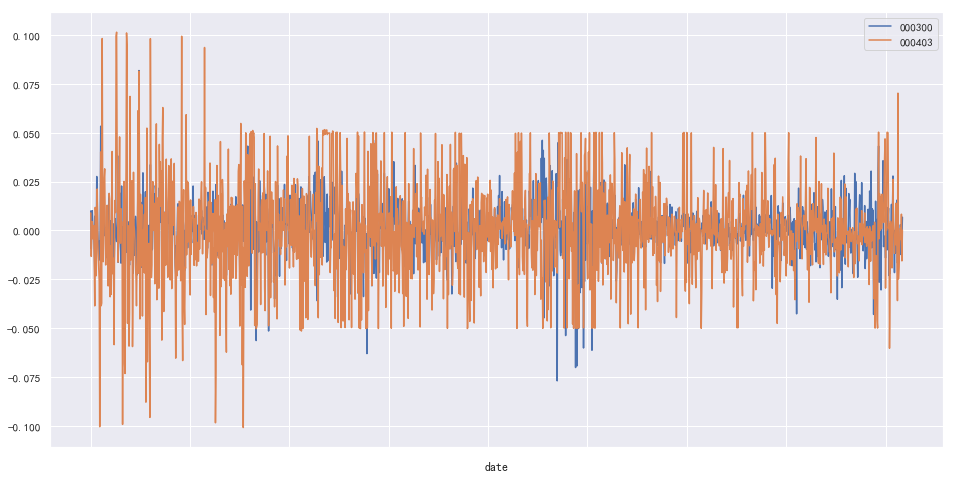

In [73]:
daily_return_1.plot()